## Data Ingestion

In [20]:
import pandas as pd
import os

#### To Read CSV files

In [21]:
def read_csv(file_path):
    data=pd.read_csv(file_path)
    return data

#### To Read JSON files

In [22]:
def read_json(file_path):
    data=pd.read_json(file_path)
    return data

#### To Read Excel files

In [23]:
def read_excel(file_path):
    data=pd.read_excel(file_path)
    return data

In [24]:
def read_data(file_path):
    file_format=os.path.splitext(file_path)[1].lower()
    
    if file_format=='.csv':
        return read_csv(file_path)
    elif file_format=='.json':
        return read_json(file_path)
    elif file_format=='.xlsx':
        return read_excel(file_path)
    else:
        raise ValueError(f"Unsupported file format: {file_format}")

In [25]:
data=read_data('olympics2024.csv.csv')
data.head(10)

,Rank,Country,Country Code,Gold,Silver,Bronze,Total
0,1,United States,US,40,44,42,126
1,2,China,CHN,40,27,24,91
2,3,Japan,JPN,20,12,13,45
3,4,Australia,AUS,18,19,16,53
4,5,France,FRA,16,26,22,64
5,6,Netherlands,NED,15,7,12,34
6,7,Great Britain,GBG,14,22,29,65
7,8,South Korea,KOR,13,9,10,32
8,9,Italy,ITA,12,13,15,40
9,10,Germany,GER,12,13,8,33


## Data Cleaning and Preprocessing pipeline

In [26]:
from sklearn.preprocessing import StandardScaler

def preprocess_data(data):
    
    # To handle missing values
    data = data.fillna(0)
    
    # To convert datatype to int
    data['Rank']=data['Rank'].astype(int)

    data[['Gold', 'Silver', 'Bronze', 'Total']] = data[['Gold', 'Silver', 'Bronze', 'Total']].astype(int)
    
    # Feature Engineering
    data['Gold_Ratio'] = data['Gold'] / data['Total']
    data['Gold_Ratio'] = data['Gold_Ratio'].fillna(0)
    
    # Encoding categorical variables
    data = pd.get_dummies(data, columns=['Country', 'Country Code'], drop_first=True)
    
    # Scaling numerical features
    scaler = StandardScaler()
    num_cols = ['Rank', 'Gold', 'Silver', 'Bronze', 'Total', 'Gold_Ratio']
    data[num_cols] = scaler.fit_transform(data[num_cols])
    
    return data


## Identifying Key Patterns 

In [27]:
def descriptive_analysis(data):
    return data.describe()

In [28]:
def correlation_analysis(data):
    return data.corr()

#### Linear Regression

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def linear_regression_analysis(data,target_column):
    X=data.drop(columns=[target_column])
    y=data[target_column]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    
    return model, mse

#### K-Means Clustering

In [30]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 

def kmeans_clustering(data,n_clusters):
    model=KMeans(n_clusters=n_clusters,random_state=42)
    cluster=model.fit_predict(data)
    
    data['Cluster']=cluster
    return model,data

def plot_clusters(data,cluster_column='Cluster'):
    plt.scatter(data.iloc[:,0],data.iloc[:,1],c=data[cluster_column],cmap='viridis')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Clusters')
    plt.colorbar(label='Cluster')
    plt.show()

#### Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def decision_tree_regression(data, target_column):
    X = data.drop(columns=[target_column])
    y = data[target_column]
    
    # Ensure X and y do not contain non-numeric data
    X = pd.get_dummies(X, drop_first=True)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    model = DecisionTreeRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mse = mean_squared_error(y_test, y_pred)
    return model, mse


In [32]:
def analysis_pipeline(data, target_column):
    data=preprocess_data(data)
    
    if not target_column:
        print("Target column is not specified for ML models.")
        return

    print("Descriptive Analysis:")
    print(descriptive_analysis(data))
    
    print("\nCorrelation Analysis:")
    print(correlation_analysis(data))
    
    print("\nLinear Regression Analysis:")
    model, mse = linear_regression_analysis(data, target_column)
    print(f"Mean Squared Error: {mse}")
    
    print("\nK-Means Clustering:")
    kmeans_model, clustered_data = kmeans_clustering(data, n_clusters=3)  
    print(clustered_data.head())
    plot_clusters(clustered_data)
    
    print("\nDecision Tree Regression:")
    dt_model, mse = decision_tree_regression(data, target_column)
    print(f"Mean Squared Error: {mse}")



Descriptive Analysis:
               Rank          Gold        Silver        Bronze         Total  \
count  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01  9.100000e+01   
mean   4.392091e-17 -2.684056e-17  2.440051e-18 -2.562053e-17 -7.320152e-18   
std    1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00  1.005540e+00   
min   -1.736814e+00 -5.184865e-01 -5.336601e-01 -6.469415e-01 -5.316647e-01   
25%   -8.548380e-01 -5.184865e-01 -5.336601e-01 -4.936299e-01 -4.806293e-01   
50%   -5.126012e-02 -3.746381e-01 -3.851492e-01 -3.403182e-01 -3.275234e-01   
75%    8.895139e-01 -8.694134e-02 -8.812736e-02  1.196168e-01 -1.233821e-01   
max    1.516697e+00  5.235449e+00  6.000820e+00  5.792149e+00  5.847751e+00   

         Gold_Ratio  
count  9.100000e+01  
mean   9.272192e-17  
std    1.005540e+00  
min   -1.129906e+00  
25%   -1.129906e+00  
50%   -6.194780e-02  
75%    7.243509e-01  
max    3.141926e+00  

Correlation Analysis:
                      Rank      Gold    Silve

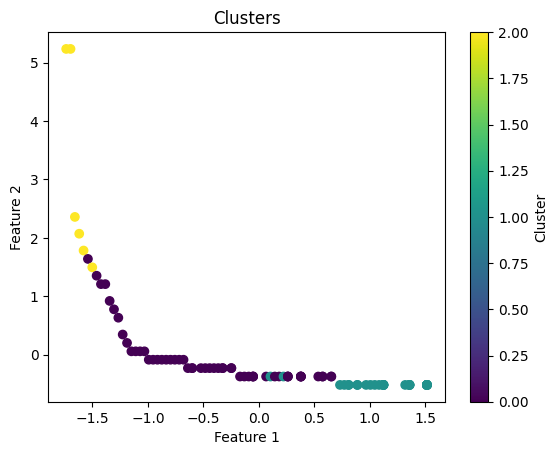


Decision Tree Regression:
Mean Squared Error: 0.6255162268989732


In [33]:
file_path = 'olympics2024.csv.csv'
target_column = 'Total'
data = read_data(file_path)
analysis_pipeline(data, target_column)

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_descriptive_statistics(data):
    num_columns = data.select_dtypes(include=['number']).columns
    for col in num_columns:
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        sns.histplot(data[col], kde=True)
        plt.title(f'Histogram of {col}')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(x=data[col])
        plt.title(f'Boxplot of {col}')
        
        plt.tight_layout()
        plt.savefig(f'{col}_plots.png')
        plt.close()

def plot_correlation_matrix(data):
    plt.figure(figsize=(12, 10))
    correlation_matrix = data.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Matrix')
    plt.savefig('correlation_matrix.png')
    plt.close()

def plot_kmeans_clusters(clustered_data):
    plt.figure(figsize=(12, 8))
    sns.scatterplot(x=clustered_data['Gold'], y=clustered_data['Silver'], hue=clustered_data['Cluster'], palette='viridis')
    plt.title('K-Means Clustering Results')
    plt.xlabel('Gold Medals')
    plt.ylabel('Silver Medals')
    plt.savefig('kmeans_clusters.png')
    plt.close()


In [35]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas
from reportlab.lib.units import inch
from reportlab.lib.utils import ImageReader

def generate_pdf_report(filename, plots):
    c = canvas.Canvas(filename, pagesize=letter)
    width, height = letter
    
    # Set the title
    c.setFont("Helvetica-Bold", 16)
    c.drawString(1 * inch, height - 1 * inch, "Data Analysis Report")
    
    y_position = height - 2 * inch
    
    for title, plot_filename in plots.items():
        # Set the subtitle
        c.setFont("Helvetica-Bold", 12)
        c.drawString(1 * inch, y_position, title)
        y_position -= 0.5 * inch
        
        # Load the image to get its width and height
        image = ImageReader(plot_filename)
        img_width, img_height = image.getSize()
        
        # Calculate the x-position to center the image
        x_position = (width - img_width) / 2
        
        # Draw the image centered
        c.drawImage(plot_filename, x_position, y_position - img_height, width=img_width, height=img_height)
        
        y_position -= img_height + 0.5 * inch  # Update y_position for the next image or title
    
    # Save the PDF
    c.save()

    # Example usage:
    plots = {
        "Correlation Matrix": "correlation_matrix.png",
        "Distribution Plot": "distribution_plot.png"
    }

    generate_pdf_report("data_analysis_report.pdf", plots)


OSError: 
fileName='distribution_plot.png' identity=[ImageReader@0x1dd4b4e8890 filename='distribution_plot.png'] Cannot open resource "distribution_plot.png"

In [ ]:
def complete_analysis_pipeline(file_path, file_format='csv', target_column=None):
    # Load Data
    data = read_data(file_path)
    
    # Preprocess Data
    data = preprocess_data(data)
    
    # Analysis
    plot_descriptive_statistics(data)
    plot_correlation_matrix(data)
    
    if target_column:
        kmeans_model, clustered_data = kmeans_clustering(data, n_clusters=3)  
        plot_kmeans_clusters(clustered_data)
    
    
plots = {
        'Correlation Matrix': 'correlation_matrix.png',
        'K-Means Clustering': 'kmeans_clusters.png'
    }
generate_pdf_report('report.pdf', plots)
if __name__ == "__main__":
    file_path = 'olympics2024.csv.csv'
    target_column = 'Total'
    complete_analysis_pipeline(file_path, file_format='csv', target_column=target_column)


## User Interaction

In [ ]:
def perform_analysis(data):
    # Your analysis code here
    pass

In [ ]:
import argparse
import pandas as pd

def load_data(file_path):
    """Load data from a CSV file."""
    return pd.read_csv(file_path)

def main():
    parser = argparse.ArgumentParser(description="AI Employee Prototype CLI")
    parser.add_argument('command', choices=['load', 'analyze', 'report'], help='Command to execute')
    parser.add_argument('--file', type=str, help='Path to the CSV file')
    parser.add_argument('--report', type=str, help='Path to save the report')
    parser.add_argument('--plots', type=str, nargs='+', help='List of plot filenames')
    args = parser.parse_args()

    if args.command == 'load':
        if not args.file:
            print("Error: --file argument is required for load command.")
            return
        data = load_data(args.file)
        print("Data loaded successfully.")

    elif args.command == 'analyze':
        if not args.file:
            print("Error: --file argument is required for analyze command.")
            return
        data = load_data(args.file)
        print("Performing analysis...")
        perform_analysis(data)  # Call your analysis functions here
        print("Analysis complete.")

    elif args.command == 'report':
        if not args.report:
            print("Error: --report argument is required for report command.")
            return
        if not args.plots:
            print("Error: --plots argument is required for report command.")
            return
        plots = {f"Plot {i+1}": plot for i, plot in enumerate(args.plots)}
        generate_pdf_report(args.report, plots)
        print(f"Report generated and saved to {args.report}.")

if __name__ == "__main__":
    main()


usage: ipykernel_launcher.py [-h] [--file FILE] [--report REPORT]
                             [--plots PLOTS [PLOTS ...]]
                             {load,analyze,report}
ipykernel_launcher.py: error: the following arguments are required: command


SystemExit: 2

c:\Users\Avantika Bisht\OneDrive\Desktop\Project\AI_Employee_Prototype\.env\Lib\site-packages\IPython\core\interactiveshell.py:3585: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)
